In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = 'data_clean/MFC_ActualizacionJul2023_clean.pkl'
with open(in_file, 'rb') as f:
    df = load(f)
    
df.tail()

,Panteón_origen,Estatus_FC,Fecha_inhumación_date,Fecha_inhumación_date_diasemana,Fecha_inhumación_date_semanaaño,Fecha_defunción_date,Fecha_defunción_date_diasemana,Fecha_defunción_date_semanaaño,Restos_tipo,Sexo,Edad,Edad_int,Conocido_Desconocido,Primer_apellido,Segundo_apellido,Nombre(s),Nombre_completo,Institución_origen,Tipo_institución_origen
ID,,,,,,,,,,,,,,,,,,,
XX-P10757,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-10-31,Miércoles,44,Restos cremados,Masculino,25,25.0,Desconocido,,,,,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P10758,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-10-27,Sábado,43,Restos cremados,Masculino,45,45.0,Desconocido,,,,,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P10759,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-11-01,Jueves,44,Restos cremados,Femenino,40,40.0,Conocido,Hernandez,Gomez,Monica,Monica Hernandez Gomez,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública
XX-P1076,Panteón Civil de Dolores,Inhumación,2018-07-25,Miércoles,30,2017-04-30,Domingo,17,Cadáver,Masculino,46,46.0,Conocido,Fuentes,Madrigal,Javier Guillermo,Javier Guillermo Fuentes Madrigal,Instituto Politecnico Nacional - Escuela Nacio...,Escuela pública
XX-P10760,Panteón Civil de Dolores,Inhumación,2003-08-06,Miércoles,32,2001-11-15,Jueves,46,Restos cremados,Femenino,75,75.0,Conocido,Rios,Parada,Delia,Delia Rios Parada,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública


In [2]:
df['Edad_int'].value_counts().sort_index()

Edad_int
3.0     1
5.0     1
9.0     1
11.0    1
12.0    1
       ..
90.0    1
91.0    2
92.0    2
94.0    1
96.0    1
Name: count, Length: 84, dtype: int64

In [3]:
min_edad = int(df['Edad_int'].min())
max_edad = int(df['Edad_int'].max())

edad_freq = df['Edad_int'].value_counts(bins=range(min_edad - 1, max_edad)).sort_index()
edad_freq

Edad_int
(1.999, 3.0]    1
(3.0, 4.0]      0
(4.0, 5.0]      1
(5.0, 6.0]      0
(6.0, 7.0]      0
               ..
(90.0, 91.0]    2
(91.0, 92.0]    2
(92.0, 93.0]    0
(93.0, 94.0]    1
(94.0, 95.0]    0
Name: count, Length: 93, dtype: int64

In [4]:
edad_freq.index = range(min_edad, max_edad)
edad_freq

3     1
4     0
5     1
6     0
7     0
     ..
91    2
92    2
93    0
94    1
95    0
Name: count, Length: 93, dtype: int64

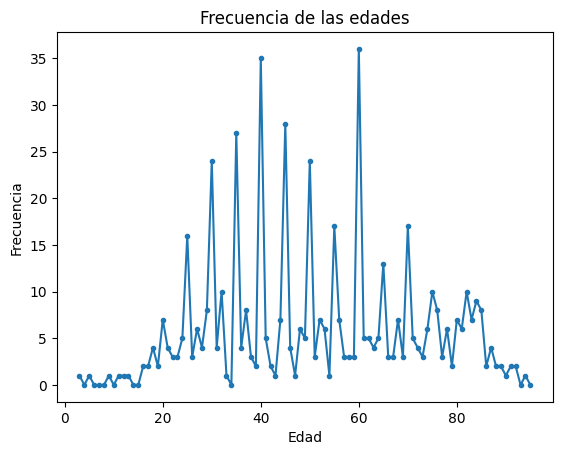

In [5]:
edad_freq.plot(style='.-', title='Frecuencia de las edades',
              xlabel='Edad', ylabel='Frecuencia'
              )
plt.show()

In [6]:
df['Edad_int'].mean()

51.77695167286245

In [7]:
df['Edad_int'].median()

50.0

In [8]:
df['Edad_int'].mode()

0    60.0
Name: Edad_int, dtype: float64

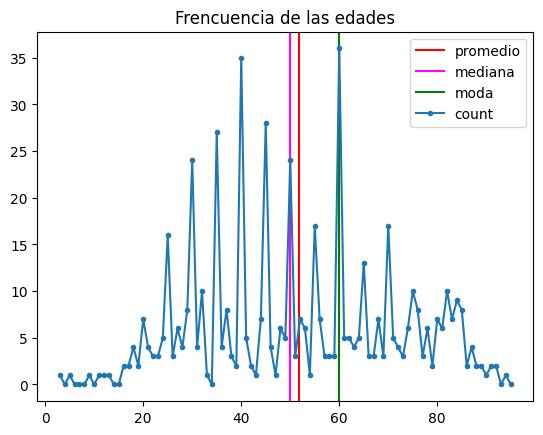

In [9]:
# Gráficas de las medidas estadísticas
plt.axvline(df['Edad_int'].mean(), color='red', label='promedio')
plt.axvline(df['Edad_int'].median(), color='magenta', label='mediana')
plt.axvline(df['Edad_int'].mode()[0], color='green', label='moda')

# Gráfica de la frecuencia de las edades
edad_freq.plot(style=".-", title='Frencuencia de las edades')

# Leyenda y mostrar gráfica
plt.legend()
plt.show()

In [10]:
df['Edad_int'].skew()

0.10419911864543228

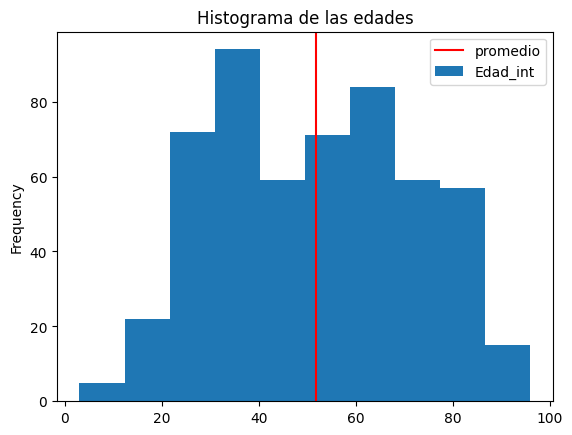

In [12]:
# Gráficas de las medidas estadísticas
plt.axvline(df['Edad_int'].mean(), color='red', label='promedio')

# Gráfica de la frecuencia de las edades
df['Edad_int'].plot.hist(title='Histograma de las edades')

# Leyenda y mostrar gráfica
plt.legend()
plt.show()

In [13]:
df['Edad_int'].std()

19.97863077201894

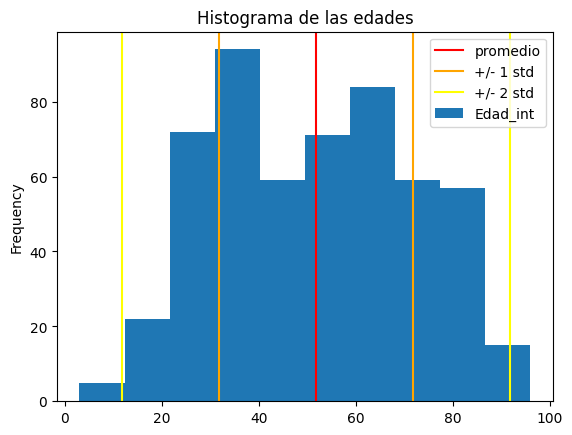

In [14]:
# Gráficas de las medidas estadísticas
plt.axvline(df['Edad_int'].mean(), color='red', label='promedio')
plt.axvline(df['Edad_int'].mean() + df['Edad_int'].std(), color='orange', label='+/- 1 std')
plt.axvline(df['Edad_int'].mean() - df['Edad_int'].std(), color='orange')
plt.axvline(df['Edad_int'].mean() + df['Edad_int'].std() * 2, color='yellow', label='+/- 2 std')
plt.axvline(df['Edad_int'].mean() - df['Edad_int'].std() * 2, color='yellow')

# Gráfica de la frecuencia de las edades
df['Edad_int'].plot.hist(title='Histograma de las edades')

# Leyenda y mostrar gráfica
plt.legend()
plt.show()

In [16]:
df['Fecha_defunción_date'].dt.year.value_counts().sort_index()

Fecha_defunción_date
1999.0      8
2000.0      7
2001.0     36
2002.0     33
2003.0     83
2005.0      1
2006.0      1
2007.0      2
2008.0      2
2009.0      8
2010.0     28
2011.0     92
2012.0     48
2014.0      2
2015.0      1
2017.0     44
2018.0    118
2019.0     24
2020.0    110
2021.0    195
Name: count, dtype: int64

<Axes: >

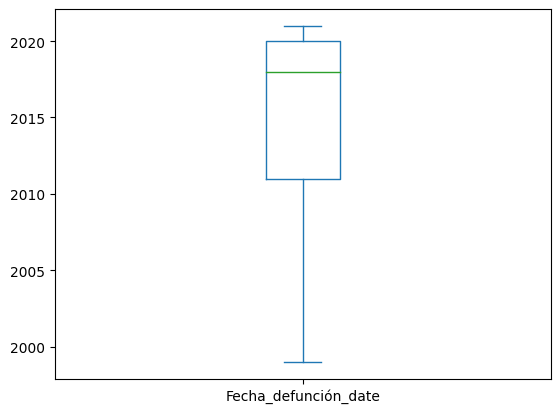

In [17]:
df['Fecha_defunción_date'].dt.year.plot.box()

In [18]:
df['Institución_origen'].value_counts(dropna=False, normalize=True)

Institución_origen
Instituto De Ciencias Forenses - Tribunal Superior De Justicia De La Ciudad De Mexico    0.687
Universidad Nacional Autonoma De Mexico - Facultad De Medicina                           0.189
Instituto Politecnico Nacional - Escuela Nacional De Medicina Y Homeopatia               0.113
Centro Cultural Universitario Justo Sierra                                               0.008
S/D                                                                                      0.001
Universidad Westhill - Facultad De Medicina                                              0.001
Universidad Tominaga Nakamoto S.C. Escuela De Medicina Ciencias Basicas                  0.001
Name: proportion, dtype: float64